Calculating Cosine Similarities

Author: Jerry Zou

Tutorial: https://memgraph.com/blog/cosine-similarity-python-scikit-learn

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import os
# To plot heat map and coordinate axis map:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Input documents
# twitter = """
# Twitter is an online social media and social networking service owned and operated by American company X Corp.,
# the legal successor of Twitter, Inc. Twitter users outside the United States are legally served by the Ireland-based
# Twitter International Unlimited Company, which makes these users subject to Irish and European Union data protection laws.
# On Twitter users post texts, photos and videos known as 'tweets'. Registered users can tweet, like, 'retweet' tweets,
# and direct message (DM) other registered users, while unregistered users only have the ability to view public tweets.
# Users interact with Twitter through browser or mobile frontend software, or programmatically via its APIs.
# """
# facebook = """
# Facebook is an online social media and social networking service owned by American technology giant Meta Platforms.
# Created in 2004 by Mark Zuckerberg with fellow Harvard College students and roommates Eduardo Saverin, Andrew McCollum,
# Dustin Moskovitz, and Chris Hughes, its name derives from the face book directories often given to American university students.
# Membership was initially limited to only Harvard students, gradually expanding to other North American universities and,
# since 2006, anyone over 13 years old. As of December 2022, Facebook claimed 2.96 billion monthly active users, and ranked third
# worldwide among the most visited websites. It was the most downloaded mobile app of the 2010s. Facebook can be accessed from devices
# with Internet connectivity, such as personal computers, tablets and smartphones. After registering, users can create a profile
# revealing information about themselves. They can post text, photos and multimedia which are shared with any other users who have
# agreed to be their friend' or, with different privacy settings, publicly. Users can also communicate directly with each other with
# Messenger, join common-interest groups, and receive notifications on the activities of their Facebook friends and the pages they follow.
# """
# tiktok = """
# TikTok, and its Chinese counterpart Douyin (Chinese: 抖音; pinyin: Dǒuyīn), is a short-form video hosting service owned by ByteDance.
# It hosts user-submitted videos, which can range in duration from 3 seconds to 10 minutes. Since their launches, TikTok and Douyin have
# gained global popularity.[6][7] In October 2020, TikTok surpassed 2 billion mobile downloads worldwide. Morning Consult named TikTok the
# third-fastest growing brand of 2020, after Zoom and Peacock. Cloudflare ranked TikTok the most popular website of 2021,
# surpassing google.com.
# """
# instagram = """
# Instagram is a photo and video sharing social networking service owned by American company Meta Platforms. The app allows users to
# upload media that can be edited with filters and organized by hashtags and geographical tagging. Posts can be shared publicly or
# with preapproved followers. Users can browse other users' content by tag and location, view trending content, like photos, and follow
# other users to add their content to a personal feed. Instagram was originally distinguished by allowing content to be framed only in a
# square (1:1) aspect ratio of 640 pixels to match the display width of the iPhone at the time. In 2015, this restriction was eased with
# an increase to 1080 pixels. It also added messaging features, the ability to include multiple images or videos in a single post, and a
# Stories feature—similar to its main competitor Snapchat—which allowed users to post their content to a sequential feed, with each post
# accessible to others for 24 hours. As of January 2019, Stories is used by 500 million people daily.
# """
# documents = [twitter, facebook, tiktok, instagram]
# Put the folder pathname here:
folderPath = "/Users/Jerry/Desktop/Submission Diary entries"

# The following dictionary stores the content of all files. The document is in this format - key: (type: string. file name without ".txt") | value: (type: string. the text of the document combined into one paragraph):

titleContentDictionary = {}

# The loadFolder function below reads the "folderPath" variable and loads content into the dictionary above.
def loadFolder(folder):
    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            filePath = os.path.join(folder, filename)
            with open(filePath, "r") as fileToOpen:
                content = fileToOpen.read()
                content = content.replace("\n", "")
                content = " ".join(content.split())
                titleContentDictionary[filename[:-4]] = content
loadFolder(folderPath)

In [25]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    max_features = 100, # an integer. This decides how many output terms from most frequent to least frequent you wish the program to provide. For example, max_features = 100 means you wish to see the 100 most frequent terms (ngrams) in the corpus.
    max_df = 0.8, # a float. Words appearing in over 80% of documents will be ignored.
    min_df = 3, # an integer. Words appearing in less than 5 documents will be ignored.
    ngram_range = (1,3), # looking at single word, double-word-group (bigram), and triple-word-group (trigram). From 1 to 3-term pairs. Could change the number to customize the size of the terms you wish to see. E.g.: (2, 3) would mean only searching for bigrams and trigrams.
    stop_words = "english"
)

In [26]:
contentAsDictValues = titleContentDictionary.values() # Type: <class "dict_values"> . This is NOT a list and should not be passed into "vectorizer.fit_transform" in the next cell!

# This variable stores the content of the files and should be passed into "vectorizer.fit_transform" in the next file.
contentAsList = []

# This "for" loop is to turn the <class "dict_values"> variable "contentAsDictValues" into the <class "list> variable "contentAsList"
for chapter in titleContentDictionary.values():
    contentAsList.append(chapter)

In [27]:
vectors = vectorizer.fit_transform(contentAsList)
featuresNames = vectorizer.get_feature_names_out() #no parameters passed in.
dense = vectors.todense() # turn data to "dense" type so we could graph it out easily.

dataFrameIndexList = []
for key in titleContentDictionary.keys():
    dataFrameIndexList.append(str(key))
dataFrameTFIDF = pd.DataFrame(dense, columns=featuresNames, index=dataFrameIndexList) # This pandas datatable contains the TF-IDF score of significant word in relation to each specific document
print(dataFrameTFIDF)

dataFrameTFIDFTransposed = dataFrameTFIDF.T

cosineSim = cosine_similarity(dataFrameTFIDFTransposed, dataFrameTFIDFTransposed)

dataFrameCos = pd.DataFrame(cosineSim, columns=featuresNames, index=featuresNames) # This pandas datatable contains the similarity score between each significant word.

                        abbes     asked      away       ben  ben abbes  \
Submission4.8        0.000000  0.000000  0.112374  0.000000   0.000000   
Submission_Epigraph  0.000000  0.000000  0.000000  0.000000   0.000000   
Submission2.9        0.286800  0.067111  0.057657  0.286800   0.286800   
Submission2.8        0.000000  0.040853  0.000000  0.000000   0.000000   
Submission5.9.       0.000000  0.000000  0.000000  0.000000   0.000000   
Submission5.8        0.217177  0.067759  0.029107  0.217177   0.217177   
Submission5.3        0.147113  0.137697  0.118300  0.147113   0.147113   
Submission5.2        0.000000  0.000000  0.000000  0.000000   0.000000   
Submission3.4        0.092780  0.000000  0.149218  0.092780   0.092780   
Submission1.4        0.000000  0.145260  0.062399  0.000000   0.000000   
Submission5.1        0.000000  0.000000  0.000000  0.000000   0.000000   
Submission1.5        0.000000  0.186876  0.000000  0.000000   0.000000   
Submission1.1        0.000000  0.00000

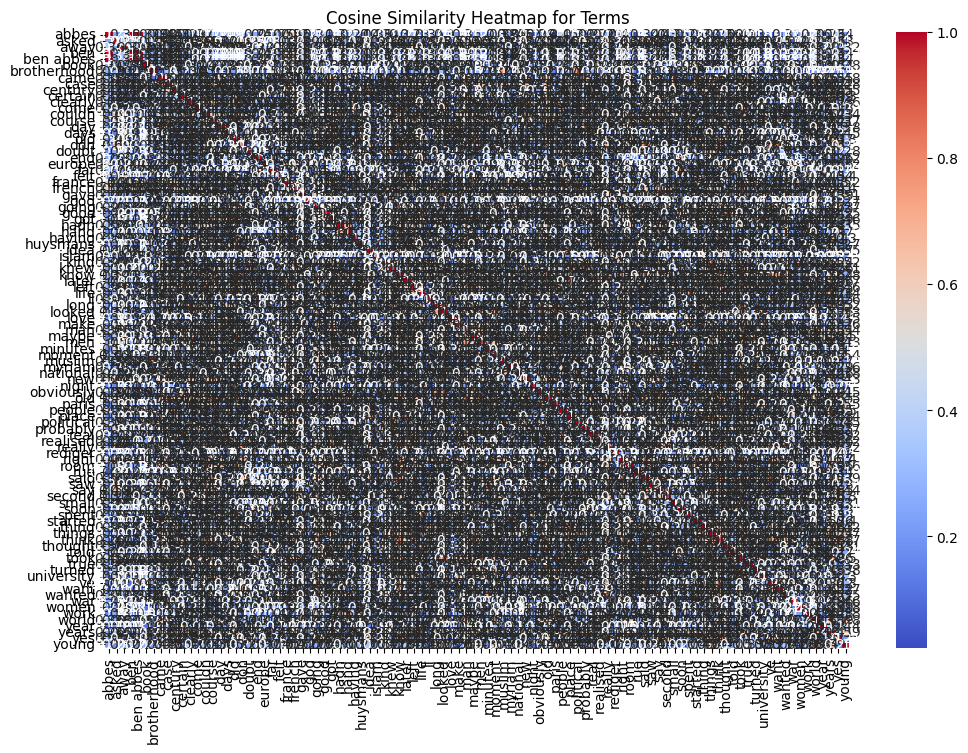

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataFrameCos, annot=True, cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.title("Cosine Similarity Heatmap for Terms")
plt.show()
